In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import random

In [41]:
from statistics import mean

# metoda gradientului descrescator bazat pe batch-uri
class BGDRegression:
    def __init__(self):
        self.intercept_ = 0.0   # intercept_ este intercept-ul ecuației de regresie liniară
        self.coefficient_ = []  # coefficient_ este lista coeficienților ecuației de regresie liniară

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = [random.random() for _ in range(len(x[0]) + 1)]  # inițializarea aleatoare a coeficienților
        for epoch in range(no_epochs):
            errors = []  # erorile înregistrate la fiecare iterație
            for i in range(len(x)):
                y_computed = self.eval(x[i])  # calculează valoarea y prezisa pentru x[i]
                errors.append(y_computed - y[i])  # calculează eroarea dintre valoarea prezisa și valoarea reală și o adaugă la lista de erori
            error = mean(errors)  # calculează media erorilor
            for i in range(len(x)):
                for j in range(0, len(x[0])):
                    self.coefficient_[j] = self.coefficient_[j] - learning_rate * error * x[i][j]  # actualizează fiecare coeficient folosind gradientul
                self.coefficient_[len(x[0])] = self.coefficient_[len(x[0])] - learning_rate * error * 1  # actualizează intercept-ul folosind gradientul
        self.intercept_ = self.coefficient_[-1]  # ultimul coeficient din coeficient_ este intercept-ul
        self.coefficient_ = self.coefficient_[:-1]  # lista coeficienților este redusă la toți coeficienții, cu excepția intercept-ului

    def eval(self, xi):
        yi = self.coefficient_[-1]  # inițializează y cu intercept-ul
        for j in range(len(xi)):
            yi += self.coefficient_[j] * xi[j]  # adaugă contribuția fiecărui coeficient la y
        return yi  # returnează valoarea y prezisa

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]  # calculează valorile y prevăzute pentru fiecare x
        return y_computed  # returnează lista valorilor y prezise


In [42]:
# metoda gradientului descrescator stocastic
class SGDRegression:
    def __init__(self):
        self.intercept_ = 0.0   # initializam interceptia cu 0
        self.coefficient_ = []  # initializam coeficientii cu o lista vida

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000):
        self.coefficient_ = [random.random() for _ in range(len(x[0]) + 1)]  # initializam coeficientii cu valori aleatoare
        for epoch in range(no_epochs):
            for i in range(len(x)):
                y_computed = self.eval(x[i])  # calculam predictia pe baza datelor de antrenament
                crt_error = y_computed - y[i]  # calculam eroarea dintre predictie si eticheta reala
                for j in range(0, len(x[0])):
                    # actualizam fiecare coeficient in functie de eroare, rata de invatare si valoarea curenta a caracteristicii
                    self.coefficient_[j] = self.coefficient_[j] - learning_rate * crt_error * x[i][j]
                # actualizam ultimul coeficient (interceptia) in functie de eroare si rata de invatare
                self.coefficient_[len(x[0])] = self.coefficient_[len(x[0])] - learning_rate * crt_error * 1
        self.intercept_ = self.coefficient_[-1]  # setam interceptia cu ultimul coeficient
        self.coefficient_ = self.coefficient_[:-1]  # eliminam ultimul coeficient din lista

    def eval(self, xi):
        yi = self.coefficient_[-1]  # setam predictia cu ultimul coeficient
        for j in range(len(xi)):
            yi += self.coefficient_[j] * xi[j]  # adaugam fiecare caracteristica ponderata cu coeficientul corespunzator
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]  # calculam predictiile pentru datele de intrare
        return y_computed


In [43]:
def load_data(filename, input_features, output_feature):
    file = pd.read_csv(filename)
    features = []
    for feature in input_features:
        features.append([float(value) for value in file[feature]])
    output_feature = [float(value) for value in file[output_feature]]
    return features, output_feature


def plot_histogram(x, variable_name):
    plt.hist(x, 10)
    plt.title('Histogram of ' + variable_name)
    plt.show()


def plot_linearity(input_feature, output_feature, input_name, output_name):
    plt.plot(input_feature, output_feature, 'ro')
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title(input_name + ' vs. ' + output_name)
    plt.show()

In [44]:
# Aceasta functie preia setul de caracteristici si setul de rezultate si returneaza o impartire aleatoare a acestora in doua submultimi: o multime de antrenament si o multime de validare.
def train_and_test(features, result):
    # fixeaza seeds pentru generarea aleatoare a numerelor pentru reproducibilitate
    np.random.seed(5)
    
    # creeaza o lista cu indecsii
    indexes = [i for i in range(len(result))]

    # extrage 80% dintre indecsii aleatoriu pentru multimea de antrenament
    train_sample_indexes = np.random.choice(indexes, int(0.8 * len(result)), replace=False)

    # restul de indecsi formeaza multimea de validare
    validation_sample_indexes = [i for i in range(len(result)) if i not in train_sample_indexes]

    # creeaza lista de caracteristici pentru multimea de antrenament si validare
    train_features = []
    validation_features = []

    # extrage caracteristicile corespunzatoare pentru fiecare element din multimea de antrenament si validare
    for feature in features:
        train_features.append([feature[i] for i in train_sample_indexes])
        validation_features.append([feature[i] for i in validation_sample_indexes])
        
    # creeaza lista de rezultate pentru multimea de antrenament si validare
    train_result = [result[i] for i in train_sample_indexes]
    validation_result = [result[i] for i in validation_sample_indexes]

    # returneaza lista de caracteristici si lista de rezultate pentru multimea de antrenament si validare
    return train_features, train_result, validation_features, validation_result


In [45]:
def plot_train_and_test(train_features, train_result, validation_features, validation_result, input_name, output_name):
    plt.plot(train_features, train_result, 'ro', label='Training data')
    plt.plot(validation_features, validation_result, 'g^', label='Testing data')
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title('Train and test')
    plt.legend()
    plt.show()

In [46]:
# modelul linear facut cu tool
def learning_by_tool(train_input, train_output, validation_input):
    # pregatim datele pentru regresie, trecandu-le sub forma de lista de liste
    xx = [[el] for el in train_input]
    # initializam un regresor cu gradientul descrescator stocastic, cu un coeficient de invatare de 0.01 si un numar maxim de epoci de 1000
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    # antrenam regresorul pe datele de antrenare xx si etichetele train_output
    regressor.fit(xx, train_output)
    # preluam coeficientii modelului invatat
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    # afisam formula modelului invatat
    print('Learnt model by tool: f(x) =', w0, '+', w1, '* x')
    # calculam iesirile prezise pe datele de validare
    computed_outputs = regressor.predict([[x] for x in validation_input])
    return w0, w1, computed_outputs

# modelul linear facut de mine
def learning_by_me(train_input, train_output, validation_input):
    # pregatim datele pentru regresie, trecandu-le sub forma de lista de liste
    xx = [[el] for el in train_input]
    # initializam un regresor cu gradientul descrescator pe toate datele, adica batch gradient descent
    regressor = BGDRegression()
    # antrenam regresorul pe datele de antrenare xx si etichetele train_output
    regressor.fit(xx, train_output)
    # preluam coeficientii modelului invatat
    w0, w1 = regressor.intercept_, regressor.coefficient_[0]
    # afisam formula modelului invatat
    print('Learnt model by me: f(x) = ', w0, '+', w1, '* x')
    # calculam iesirile prezise pe datele de validare
    computed_outputs = regressor.predict([[x] for x in validation_input])
    return w0, w1, computed_outputs


In [47]:
# calcularea erorii de predicite
def calculate_error(computed_output, validation_output, label):
    error = mean_squared_error(validation_output, computed_output)
    print(f'Prediction error by {label}:  ', error)

In [48]:
# Definim o functie pentru invatarea unui model liniar prin metoda BGD pe setul de antrenare pentru cazul de regresie univariata
def learning_by_me_univariant(train_inputs, train_output, validation_inputs):
    # Reunim intr-o lista perechile de intrari de antrenare
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    # Instantiem un obiect de tipul BGDRegression si il antrenam pe setul de intrari si iesiri de antrenare
    regressor = BGDRegression()
    regressor.fit(xx, train_output)
    # Extragem coeficientii modelului
    w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
    # Afisam modelul invatat
    print('Learnt model by me(univariant): f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')
    # Calculam outputurile prezise pe setul de validare
    computed_outputs = regressor.predict([[x, y] for x, y in zip(*validation_inputs)])
    # Returnam coeficientii modelului si outputurile prezise
    return w0, w1, w2, computed_outputs

# Definim o functie pentru invatarea unui model liniar prin metoda SGDRegressor din biblioteca scikit-learn pe setul de antrenare pentru cazul de regresie multi-variata
def learning_by_tool_multi_variant(train_inputs, train_output, validation_inputs):
    # Reunim intr-o lista perechile de intrari de antrenare
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    # Instantiem un obiect de tipul SGDRegressor si il antrenam pe setul de intrari si iesiri de antrenare
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, train_output)
    # Extragem coeficientii modelului
    w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
    # Afisam modelul invatat
    print('Learnt model by tool(multi variant): f(x) =', w0, '+', w1, '* x1', '+', w2, '* x2')
    # Calculam iesirile prezise pe setul de validare
    computed_outputs = regressor.predict([[x, y] for x, y in zip(*validation_inputs)])
    # Returnam coeficientii modelului si iesirile prezise
    return w0, w1, w2, computed_outputs


In [49]:
# functia pentru normalizarea statistica a datelor
def normalise(features, mean_value=None, std_dev=None): 
    """
    Aceasta functie primeste un set de features si optional valori pentru media si deviatia standard.
    Daca valorile pentru media si deviatia standard nu sunt furnizate, acestea sunt calculate in functie de datele de intrare.
    Functia normalizeaza valorile features-urilor si le intoarce, impreuna cu valorile de medie si deviatia standard folosite.
    """
    if mean_value is None:
        mean_value = sum(features) / len(features) # calculam media valorilor daca aceasta nu este furnizata
    if std_dev is None:
        std_dev = (1 / len(features) * sum([(feat - mean_value) ** 2 for feat in features])) ** 0.5 # calculam deviatia standard daca aceasta nu este furnizata
    normalised_features = [(feat - mean_value) / std_dev for feat in features] # normalizam valorile features-urilor
    return normalised_features, mean_value, std_dev


# functia pentru normalizarea datelor dintr-un set de date
def normalise_data(data):
    """
    Aceasta functie primeste un set de date, fiecare data fiind un set de features.
    Datele sunt normalizate folosind functia normalise si sunt adaugate intr-un set separat de date normalizate.
    Functia intoarce setul de date normalizate.
    """
    mean_value, std_dev = None, None
    normalised_data = []
    for dat in data:
        normalised_features, mean_value, std_dev = normalise(dat, mean_value, std_dev) # normalizam datele
        normalised_data.append(normalised_features) # adaugam setul de date normalizate in setul de date normalizate final
    return normalised_data

In [50]:
# Funcția load_data_multi_output primește ca argumente numele fișierului de intrare, lista de nume ale caracteristicilor de intrare și numele caracteristicii de ieșire 
# și returnează două liste: una conținând datele de intrare și una conținând datele de ieșire.
def load_data_multi_output(filename, input_features, output_feature):
    # Citirea fișierului CSV cu datele de intrare și ieșire
    file = pd.read_csv(filename)
    # Inițializarea listelor pentru datele de intrare și ieșire
    features = []
    outputs = []
    # Parcurgerea tuturor caracteristicilor de intrare și adăugarea valorilor lor în lista corespunzătoare
    for feature in input_features:
        # Conversia valorilor din string în float și adăugarea lor în lista caracteristicii curente
        features.append([float(value) for value in file[feature]])
    # Parcurgerea caracteristicii de ieșire și adăugarea valorilor sale în lista corespunzătoare
    for output in output_feature:
        # Conversia valorilor din string în float și adăugarea lor în lista caracteristicii de ieșire
        outputs.append([float(value) for value in file[output]])
    # Returnarea listelor de date de intrare și ieșire
    return features, outputs



# Funcția train_and_test_multi_output primește ca argumente listele de date de intrare și ieșire și returnează patru liste separate pentru datele de antrenare și validare.
def train_and_test_multi_output(features, results):
    # Setează seed-ul generatorului de numere aleatorii pentru a obține rezultate reproduse
    np.random.seed(5)
    # Generează o listă de indici pentru datele de intrare
    indexes = [i for i in range(len(results[0]))]
    # Selectează aleatoriu 80% din indicii datelor pentru antrenament și restul de 20% pentru validare
    train_sample_indexes = np.random.choice(indexes, int(0.8 * len(results[0])), replace=False)
    validation_sample_indexes = [i for i in range(len(results[0])) if i not in train_sample_indexes]
    # Inițializează liste goale pentru stocarea datelor de intrare și ieșire de antrenament și validare
    train_features = []
    validation_features = []
    train_outputs = []
    validation_outputs = []
    # Împarte datele de intrare în seturi de antrenament și validare
    for feature in features:
        train_features.append([feature[i] for i in train_sample_indexes])
        validation_features.append([feature[i] for i in validation_sample_indexes])
    # Împarte datele de ieșire în seturi de antrenament și validare
    for result in results:
        train_outputs.append([result[i] for i in train_sample_indexes])
        validation_outputs.append([result[i] for i in validation_sample_indexes])
    # Returnează datele de intrare și ieșire de antrenament și validare sub formă de liste
    return train_features, train_outputs, validation_features, validation_outputs



# cod propriu pentru modelul de de regresie independenta multi target
def learning_by_me_multi_outputs(train_inputs, train_output, validation_inputs):
    # Construiește o listă de perechi de date de intrare, formată din valorile din cele două liste primite ca argumente
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    # Inițializează un obiect de tip BGDRegression pentru a aplica regresia liniară cu gradientul descendent
    regressor = BGDRegression()
    # Inițializează liste pentru stocarea rezultatelor și predicțiilor
    results = []
    computed_outputs = []
    # Parcurge fiecare element din lista de valori de ieșire și antrenează modelul cu valorile de intrare corespunzătoare
    for i in train_output:
        regressor.fit(xx, i)
        # Obține coeficienții și interceptul modelului de regresie liniară
        w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
        # Adaugă valorile coeficienților și interceptului la lista de rezultate
        results.append([w0, w1, w2])
        # Afișează formula modelului de regresie liniară învățat de algoritmul nostru
        print('Learnt model by me(independent outputs): f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')
        # Obține valorile de ieșire prezise pentru datele de intrare din setul de validare
        computed_outputs.append(regressor.predict([[x, y] for x, y in zip(*validation_inputs)]))
    # Returnează lista de rezultate și lista de predicții pentru valorile de ieșire
    return results, computed_outputs

# cod propriu pentru modelul de de regresie dependenta multi target
def learning_by_me_multi_dependent_outputs():
    # Generam date de intrare pentru modelul nostru de regresie liniara multipla dependent
    input_for_multiple_output, output_for_multiple_output = make_regression(n_samples=1000, n_features=2, n_targets=2,
                                                                            random_state=1, noise=0.5)

    # Setam seed-ul pentru generatorul de numere aleatoare, astfel incat sa putem obtine rezultate reproducibile
    np.random.seed(5)

    # Alegem aleator 80% din datele de intrare pentru antrenare, si restul de 20% pentru validare
    train_indexes = np.random.choice([i for i in range(len(input_for_multiple_output))],
                                    int(0.8 * len(input_for_multiple_output)), replace=False)
    validation_indexes = [i for i in range(len(input_for_multiple_output)) if i not in train_indexes]

    # Extragem datele de intrare si de iesire pentru seturile de antrenare si de validare
    train_input = [input_for_multiple_output[i] for i in train_indexes]
    train_output = [output_for_multiple_output[i] for i in train_indexes]
    validation_input = [input_for_multiple_output[i] for i in validation_indexes]
    validation_output = [output_for_multiple_output[i] for i in validation_indexes]

    # Definim un model de regresie liniara multipla cu ajutorul clasei 'LinearRegression'
    model = linear_model.LinearRegression()

    # Antrenam modelul pe datele de intrare si de iesire pentru setul de antrenare
    model.fit(train_input, train_output)

    # Afisam un grafic pentru a vedea performanta modelului nostru pe setul de validare
    plt.plot(*list(map(list, zip(*validation_output))), 'ro')
    plt.plot(*list(map(list, zip(*model.predict(validation_input)))), 'g*')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Afisam modelele invatate pentru fiecare tinta (output) in parte
    for i in range(len(model.intercept_)):
        print('Learnt model by me(dependent outputs): f(x) = ', model.intercept_[i], '+', model.coef_[i][0], '* x1', '+', model.coef_[i][1]
            , '* x2')

    # Returnam intercept-ul, coeficientii si predictiile facute pe setul de validare, impreuna cu iesirea reala
    return model.intercept_, model.coef_, model.predict(validation_input), validation_output

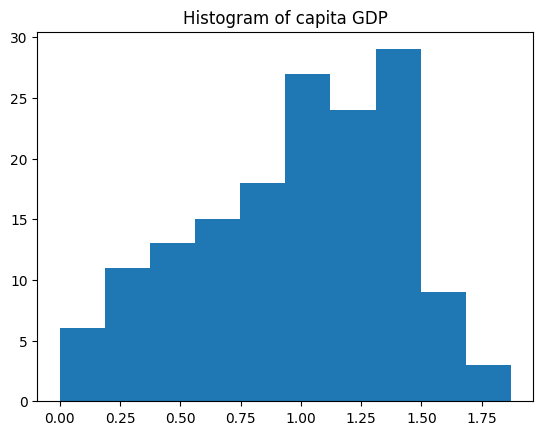

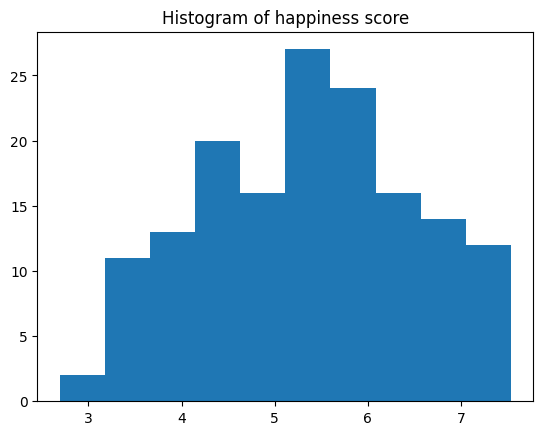

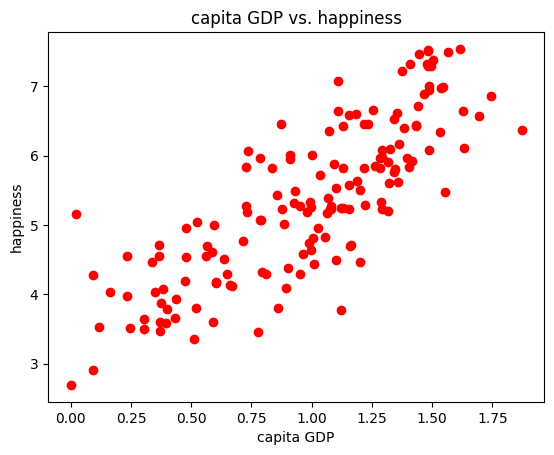

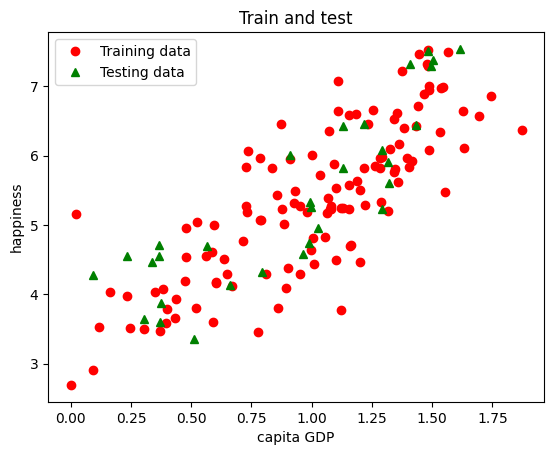

One output, one feature:
Learnt model by tool: f(x) = 2.760178119826493 + 2.5488940031775456 * x
Learnt model by me: f(x) =  2.6881183451525463 + 2.6623746372650974 * x
Prediction error by me:   0.453194603499649
One output, two features:
Learnt model by tool(multi variant): f(x) = 2.5078092804892687 + 2.356624700413637 * x1 + 1.0996327953475706 * x2
Learnt model by me(multi variant): f(x) =  2.111727537110455 + 2.6776694129195016 * x1 + 1.3718128325150418 * x2
Prediction error by me:   1.2677761994385137
Two independent outputs, two features:
Learnt model by me(independent outputs): f(x) =  0.705945777703507 + 0.2229060143705084 * x1 + 0.49204663868459864 * x2
Learnt model by me(independent outputs): f(x) =  -0.23505551583897152 + 0.6760265211961642 * x1 + 0.8481219466467323 * x2
Learnt model by me(independent outputs): f(x) =  4.377614532674677 + 0.923510324557955 * x1 + -4.373104698163048 * x2
Prediction error by me:   0.573280872592081
Prediction error by me:   1.3864169438492724
T

Learnt model by me(dependent outputs): f(x) =  -0.01612606281234452 + 87.92838751078206 * x1 + 70.35926545207525 * x2
Learnt model by me(dependent outputs): f(x) =  -0.003840587398747708 + 16.889133923787764 * x1 + 91.73376417220399 * x2
Prediction error by me:   0.2228527495666713


In [51]:
file_v1 = 'data/world-happiness-report-2017.csv'
inputs, output = load_data(file_v1, ['Economy..GDP.per.Capita.', 'Freedom'],
                           'Happiness.Score')
train_inputs, train_outputs, validation_inputs, validation_outputs = train_and_test(inputs, output)
plot_histogram(inputs[0], "capita GDP")
plot_histogram(output, "happiness score")
plot_linearity(inputs[0], output, "capita GDP", "happiness")
plot_train_and_test(train_inputs[0], train_outputs, validation_inputs[0], validation_outputs, "capita GDP",
                    "happiness")
print("One output, one feature:")
tool_result = learning_by_tool(train_inputs[0], train_outputs, validation_inputs[0])
my_result = learning_by_me(train_inputs[0], train_outputs, validation_inputs[0])
calculate_error(my_result[2], validation_outputs, 'me')
print("One output, two features:")
tool_result_multi = learning_by_tool_multi_variant(train_inputs, train_outputs, validation_inputs)
my_result_multi = learning_by_me_multi_variant(train_inputs, train_outputs, validation_inputs)
calculate_error(my_result_multi[3], validation_outputs, 'me')

inputs, output = load_data_multi_output(file_v1, ['Economy..GDP.per.Capita.', 'Freedom'],
                                        ['Happiness.Score', 'Generosity'])
data = normalise_data([*inputs, *output])
inputs, output = data[:2], data[:-1]
train_inputs, train_outputs, validation_inputs, validation_outputs = train_and_test_multi_output(inputs, output)
print("Two independent outputs, two features:")
my_result_multi_outputs = learning_by_me_multi_outputs(train_inputs, train_outputs, validation_inputs)
calculate_error(my_result_multi_outputs[-1][0], validation_outputs[0], 'me')
calculate_error(my_result_multi_outputs[-1][1], validation_outputs[1], 'me')
print("Two dependent outputs, two features:")
my_result_multi_outputs = learning_by_me_multi_dependent_outputs()
calculate_error(my_result_multi_outputs[-1], my_result_multi_outputs[-2], 'me')